# Logistic regression

This exercise has been taken from the [Stanford Machine Learning Course](https://github.com/krasserm/machine-learning-notebooks). With the original exercise written for Octave available [here](https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex2/ex2.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

### Unregularized Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams. 

In [2]:
# Admission data: 
# - exam 1 score (x1) 
# - exam 2 score (x2)
# - admitted (y)
data = np.loadtxt('/aiuoa/datasets/students_1.txt', delimiter=',')

In [3]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [4]:
# LogisticRegression estimator expect an y row vector
y = y.ravel()

Now lets visualise the data that has been provided to us.

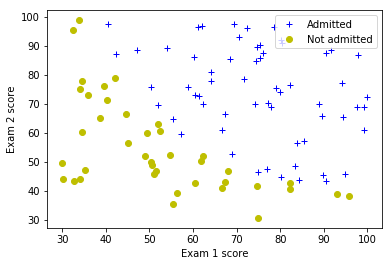

In [5]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples and decision boundary
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Admitted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

In [6]:
# Use 'lbfgs' solver for logistic regression as this is what Octave fminunc does.
# Parameter C is the inverse regularization strength (high values = low regularization).
clf = LogisticRegression(C=1e9, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [53]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [55]:
# Computes x2 at y=0.5 from x1 and model parameters
# (used for computing the linear decision boundary)
def x2(x1):
    return (10 - theta0 - theta1*x1) / theta2

In [56]:
x1_min = X[:,0].min()
x1_max = X[:,0].max()

In [57]:
# x1 and x2 data of linear decision boundary
x1_plot = np.array([x1_min, x1_max])
x2_plot = x2(x1_plot)

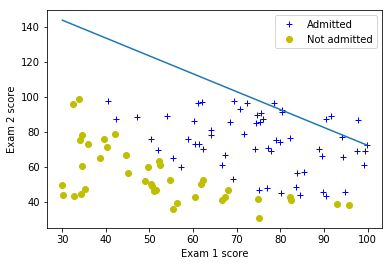

In [65]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples and decision boundary
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Admitted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)

In [66]:
X_test = np.array([
    [45., 85.],
    [50., 70.],
    [80., 80.]
])

In [67]:
# Predict class
clf.predict(X_test)

array([1., 0., 1.])

In [61]:
# Predict class probabilities
clf.predict_proba(X_test)

array([[2.23709868e-01, 7.76290132e-01],
       [9.91642300e-01, 8.35769979e-03],
       [5.78239123e-04, 9.99421761e-01]])

In [62]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [63]:
theta0, theta1, theta2

(-25.161385671019797, 0.20623222395628102, 0.20147190519771893)

In [64]:
# Classification accuracy on training set
clf.score(X, y)

0.89

### Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two di↵erent tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [ ]:
# Microchip test: 
# - test 1 (x1) 
# - test 2 (x2)
# - accepted=1, rejected=0 (y)
data = np.loadtxt('/aiuoa/datasets/students_2.txt', delimiter=',')

In [ ]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [ ]:
# Logistic regression estimator requires an y row vector
y = y.ravel()

In [ ]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Accepted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Rejected')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.legend(loc='upper right')

In [ ]:
# Preprocessor to include polynomial features up to degree 6
poly = PolynomialFeatures(6, include_bias=False)

# Mean and standard deviation scaler
scaler = StandardScaler()

# Logistic regression classifier. 
# - C=1.0 will result in good fit
# - C=1e4 will result in overfit (to little regularization)
# - C=1e-2 will result in underfit (to much regularization)
clf = LogisticRegression(C=1.0, solver='lbfgs')

# Pipeline of polynomial feature generator, feature scaler and linear regressor
model = Pipeline([('poly', poly), ('scaler', scaler), ('clf', clf)])

# Fit data to model
model.fit(X, y)

In [ ]:
# Classification accuracy on training set
model.score(X, y)

In [ ]:
grid = np.mgrid[-1:1:500j, -1:1:500j]

# Compute acceptance probabilities on 500*500 grid 
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

# Plot decision boundary on previous figure
cs = ax.contour(grid[0], grid[1], y_grid, 'g-', levels=[0.5])
ax.clabel(cs)

# Show previous figure with decision boundary
fig